In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/Shareddrives/NLP Shared Tasks/Caste-Immigration Hate Speech/train.csv")
df

,id,text,label
0,4694,தமிழ்நாடுக்கு சிறப்பு அதிகாரம் வேண்டும்.வடக்கன...,0
1,3725,Holi festival .so they go to native. 12 hours...,0
2,2469,"மதம், இனம், மொழி, நாடு, சாதி, பணக்காரன், ஏழை, ...",1
3,2637,Like this one day all these North Indias are g...,1
4,244,### I use to respect tamilians a lost but the ...,0
...,...,...,...
5350,3504,Ellarum 10 varusam 15 varusam soldranga ithell...,0
5351,4979,@yogeshwaran2530 naa mumbai la dhaan irukkuren,0
5352,5198,தமிழன் பின் வரும் காலங்களில் பிச்சை எடுக்கும் ...,0
5353,7570,வடகலை/தென்கலை மொத்தமா எல்லோருமே கிருக்கு கூ..ய...,1


In [ ]:
print(df.count())
print()
print(df[df["label"]==0].count())
print()
print(df[df["label"]==1].count())

id       5355
text     5355
label    5355
dtype: int64

id       3303
text     3303
label    3303
dtype: int64

id       2052
text     2052
label    2052
dtype: int64


(array([3303.,    0.,    0.,    0., 2052.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

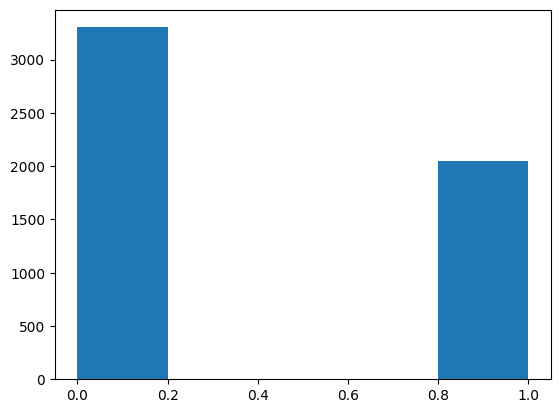

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["label"], bins=5)

In [ ]:
import string
punctuation = string.punctuation.replace(",","")
def remove_punctuation(text):
    clean="".join([i for i in text if i not in string.punctuation])
    return clean

In [ ]:
import string
def remove_punctuation(text):
    clean="".join([i for i in text if i not in string.punctuation])
    return clean

In [ ]:
df["text"] = df["text"].apply(remove_punctuation)
df

,id,text,label
0,4694,தமிழ்நாடுக்கு சிறப்பு அதிகாரம் வேண்டும்வடக்கன்...,0
1,3725,Holi festival so they go to native 12 hours ...,0
2,2469,மதம் இனம் மொழி நாடு சாதி பணக்காரன் ஏழை எல்லாமே...,1
3,2637,Like this one day all these North Indias are g...,1
4,244,I use to respect tamilians a lost but the way...,0
...,...,...,...
5350,3504,Ellarum 10 varusam 15 varusam soldranga ithell...,0
5351,4979,yogeshwaran2530 naa mumbai la dhaan irukkuren,0
5352,5198,தமிழன் பின் வரும் காலங்களில் பிச்சை எடுக்கும் ...,0
5353,7570,வடகலைதென்கலை மொத்தமா எல்லோருமே கிருக்கு கூயான்...,1


In [ ]:
tamil_stopwords = ["ஒரு", "என்று", "மற்றும்", "இந்த", "இது", "என்ற", "கொண்டு", "என்பது", "பல", "ஆகும்", "அல்லது", "அவர்",
                   "நான்", "உள்ள", "அந்த", "இவர்", "என", "முதல்", "என்ன", "இருந்து", "சில", "என்", "போன்ற", "வேண்டும்",
                   "வந்து", "இதன்", "அது", "அவன்", "தான்", "பலரும்", "என்னும்", "மேலும்", "பின்னர்", "கொண்ட", "இருக்கும்",
                   "தனது", "உள்ளது", "போது", "என்றும்", "அதன்", "தன்", "பிறகு", "அவர்கள்", "வரை", "அவள்", "நீ", "ஆகிய",
                   "இருந்தது", "உள்ளன", "வந்த", "இருந்த", "மிகவும்", "இங்கு", "மீது", "ஓர்", "இவை", "இந்தக்", "பற்றி", "வரும்",
                   "வேறு", "இரு", "இதில்", "போல்", "இப்போது", "அவரது", "மட்டும்", "இந்தப்", "எனும்", "மேல்", "பின்", "சேர்ந்த",
                   "ஆகியோர்", "எனக்கு", "இன்னும்", "அந்தப்", "அன்று", "ஒரே", "மிக", "அங்கு", "பல்வேறு", "விட்டு", "பெரும்",
                   "அதை", "பற்றிய", "உன்", "அதிக", "அந்தக்", "பேர்", "இதனால்", "அவை", "அதே", "ஏன்", "முறை", "யார்",
                   "என்பதை", "எல்லாம்", "மட்டுமே", "இங்கே", "அங்கே", "இடம்", "இடத்தில்", "அதில்", "நாம்", "அதற்கு", "எனவே",
                   "பிற", "சிறு", "மற்ற", "விட", "எந்த", "எனவும்", "எனப்படும்", "எனினும்", "அடுத்த", "இதனை", "இதை", "கொள்ள",
                   "இந்தத்", "இதற்கு", "அதனால்", "தவிர", "போல", "வரையில்", "சற்று", "எனக்"]

In [ ]:
def remove_stopwords(text):
  text = text.split()
  final = []
  for i in text:
    if i not in tamil_stopwords:
      final.append(i)
  final_text = " ".join(final)

  return final_text

In [ ]:
df["text"] = df["text"].apply(remove_stopwords)
df

NameError: ignored

In [ ]:
import re
def remove_emojis(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
df["text"] = df["text"].apply(remove_emojis)
df

,id,text,label
0,4694,தமிழ்நாடுக்கு சிறப்பு அதிகாரம் வேண்டும்வடக்கன்...,0
1,3725,Holi festival so they go to native 12 hours ...,0
2,2469,மதம் இனம் மொழி நாடு சாதி பணக்காரன் ஏழை எல்லாமே...,1
3,2637,Like this one day all these North Indias are g...,1
4,244,I use to respect tamilians a lost but the way...,0
...,...,...,...
5350,3504,Ellarum 10 varusam 15 varusam soldranga ithell...,0
5351,4979,yogeshwaran2530 naa mumbai la dhaan irukkuren,0
5352,5198,தமிழன் பின் வரும் காலங்களில் பிச்சை எடுக்கும் ...,0
5353,7570,வடகலைதென்கலை மொத்தமா எல்லோருமே கிருக்கு கூயான்க,1


In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 10.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=cce2c117a5d20eb0616f02333e22102ddc21160aa6178afe42327c88f5e656bb
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [ ]:
from googletrans import Translator

translator = Translator()

In [ ]:
df["text"] = df["text"].apply(lambda x: translator.translate(x, src="ta", dest="en").text)

df

,id,text,label
0,4694,"Tamil Nadu should have special authority, Wada...",0
1,3725,During Holi Festival so the go to 12 hours wor...,0
2,2469,"Religion, race, language, country, caste, rich...",1
3,2637,Like this one day all these North Indians are ...,1
4,244,E US TO RESPECT TAMILIANS A LOCHT BUT THE WAY ...,0
...,...,...,...
5350,3504,"Everyone says 10 years, 15 years, it's all jus...",0
5351,4979,Yogeswaran25௩0 I am in Mumbai,0
5352,5198,The Tamil will become a beggar in later times,0
5353,7570,Everyone in Vadakalai Tengala is crying,1


In [ ]:
df

,id,text,label
0,4694,"Tamil Nadu should have special authority, Wada...",0
1,3725,During Holi Festival so the go to 12 hours wor...,0
2,2469,"Religion, race, language, country, caste, rich...",1
3,2637,Like this one day all these North Indians are ...,1
4,244,E US TO RESPECT TAMILIANS A LOCHT BUT THE WAY ...,0
...,...,...,...
5350,3504,"Everyone says 10 years, 15 years, it's all jus...",0
5351,4979,Yogeswaran25௩0 I am in Mumbai,0
5352,5198,The Tamil will become a beggar in later times,0
5353,7570,Everyone in Vadakalai Tengala is crying,1


In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

# Define a function to remove stop words from a sentence
def remove_stop_words(sentence):
  # Split the sentence into individual words
  words = sentence.split()

  # Use a list comprehension to remove stop words
  filtered_words = [word for word in words if word not in stop_words]

  # Join the filtered words back into a sentence
  return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df["text"] = df["text"].apply(remove_stop_words)
df

,id,text,label
0,4694,"Tamil Nadu special authority, Wadaka come work...",0
1,3725,During Holi Festival go 12 hours work Tirupur ...,0
2,2469,"Religion, race, language, country, caste, rich...",1
3,2637,Like one day North Indians going chase every T...,1
4,244,E US TO RESPECT TAMILIANS A LOCHT BUT THE WAY ...,0
...,...,...,...
5350,3504,"Everyone says 10 years, 15 years, make believe",0
5351,4979,Yogeswaran25௩0 I Mumbai,0
5352,5198,The Tamil become beggar later times,0
5353,7570,Everyone Vadakalai Tengala crying,1


In [ ]:
X_train = df["text"]
y_train = df["label"]

In [ ]:
dev = pd.read_csv("/content/drive/Shareddrives/NLP Shared Tasks/Caste-Immigration Hate Speech/dev.csv")

In [ ]:
dev

,id,text,label
0,726,@adhimayan5521 but Bangalore la 20% mela Ta...,0
1,3170,@shadowboy7218 support pandra namma aalungal...,0
2,7660,Intukal anaivarum kudatahu eeno theriyavilla,0
3,2422,Eduku punda NTK dmk enda difference ?Y bth hur...,0
4,7241,Theva illathe aaniya yevan pudungana yenna?,0
...,...,...,...
940,4838,@naughtyballu7763 na poi patha north indian ...,0
941,4036,Please please please everyone has to fight aga...,1
942,3989,ஒரே ஒரு நியூஸ் சேனல் இருக்கும் போது கரெக்டாக ந...,1
943,2275,@chiranjeevim5604 தெலுங்கு நாயே இங்க யாரும் ...,0


In [ ]:
print(dev.count())
print()
print(dev[dev["label"]==0].count())
print()
print(dev[dev["label"]==1].count())

id       945
text     945
label    945
dtype: int64

id       594
text     594
label    594
dtype: int64

id       351
text     351
label    351
dtype: int64


(array([594.,   0.,   0.,   0., 351.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

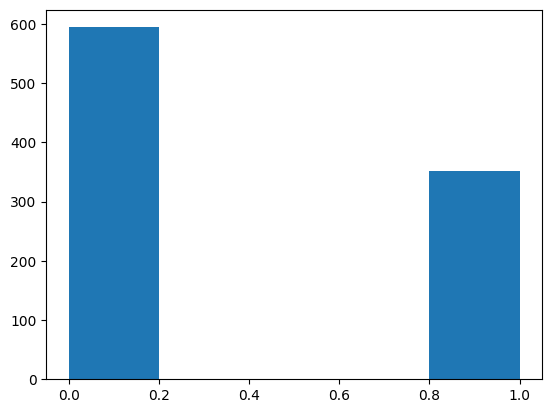

In [ ]:
import matplotlib.pyplot as plt

plt.hist(dev["label"], bins=5)

In [ ]:
dev["text"] = dev["text"].apply(remove_punctuation)
dev["text"] = dev["text"].apply(remove_emojis)
dev["text"] = dev["text"].apply(lambda x: translator.translate(x, src="ta", dest="en").text)
dev["text"] = dev["text"].apply(remove_stop_words)


In [ ]:
dev

,id,text,label
0,726,There 200 Tamils ​​in Bengaluru,0
1,3170,We need cut people support Shadowboy.,0
2,7660,Not Hindus know something,0
3,2422,Eduku punda NTK dmk enda difference Y bth hurt...,0
4,7241,What life person without God?,0
...,...,...,...
940,4838,naughtyballu7763 na poi patha north indian laa...,0
941,4036,Please please please everyone fight Jaggi vasu...,1
942,3989,"When one news channel, correct news, real news...",1
943,2275,chiranjeevim5604 telugu dog never said one com...,0


In [ ]:
X_test = dev["text"]
y_test = dev["label"]
y_dev = dev["label"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_dev = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb_y_pred_dev = nb_model.predict(X_dev)
nb_y_pred_train = nb_model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_train, nb_y_pred_train)
classification_rep = classification_report(y_train, nb_y_pred_train)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print()
print()
accuracy = accuracy_score(y_dev, nb_y_pred_dev)
classification_rep = classification_report(y_dev, nb_y_pred_dev)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8050420168067227
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      3303
           1       0.98      0.50      0.66      2052

    accuracy                           0.81      5355
   macro avg       0.87      0.75      0.76      5355
weighted avg       0.85      0.81      0.79      5355



Accuracy: 0.7058201058201058
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.97      0.81       594
           1       0.84      0.26      0.39       351

    accuracy                           0.71       945
   macro avg       0.76      0.61      0.60       945
weighted avg       0.75      0.71      0.65       945



In [ ]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
svm_y_pred_dev = svm_model.predict(X_dev)
svm_y_pred_train = svm_model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_train, svm_y_pred_train)
classification_rep = classification_report(y_train, svm_y_pred_train)
print("Accuracy:", accuracy)
print("Classification Report for SVM on Training Data:\n", classification_rep)
print()
accuracy = accuracy_score(y_test, svm_y_pred_dev)
classification_rep = classification_report(y_test, svm_y_pred_dev)
print("Accuracy:", accuracy)
print("Classification Report for SVM on Test Data:\n", classification_rep)

Accuracy: 0.9828197945845004
Classification Report for SVM on Training Data:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3303
           1       1.00      0.96      0.98      2052

    accuracy                           0.98      5355
   macro avg       0.99      0.98      0.98      5355
weighted avg       0.98      0.98      0.98      5355


Accuracy: 0.783068783068783
Classification Report for SVM on Test Data:
               precision    recall  f1-score   support

           0       0.76      0.95      0.85       594
           1       0.85      0.50      0.63       351

    accuracy                           0.78       945
   macro avg       0.81      0.73      0.74       945
weighted avg       0.80      0.78      0.77       945



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_y_pred_dev = rf_model.predict(X_dev)
rf_y_pred_train = rf_model.predict(X_train)

accuracy = accuracy_score(y_train, rf_y_pred_train)
classification_rep = classification_report(y_train, rf_y_pred_train)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print()
print()
accuracy = accuracy_score(y_dev, rf_y_pred_dev)
classification_rep = classification_report(y_dev, rf_y_pred_dev)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9979458450046685
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3303
           1       1.00      1.00      1.00      2052

    accuracy                           1.00      5355
   macro avg       1.00      1.00      1.00      5355
weighted avg       1.00      1.00      1.00      5355



Accuracy: 0.7894179894179895
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       594
           1       0.78      0.60      0.68       351

    accuracy                           0.79       945
   macro avg       0.79      0.75      0.76       945
weighted avg       0.79      0.79      0.78       945



In [ ]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_y_pred_dev = dt_model.predict(X_dev)
dt_y_pred_train = dt_model.predict(X_train)

accuracy = accuracy_score(y_train, dt_y_pred_train)
classification_rep = classification_report(y_train, dt_y_pred_train)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print()
print()
accuracy = accuracy_score(y_dev, dt_y_pred_dev)
classification_rep = classification_report(y_dev, dt_y_pred_dev)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9979458450046685
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3303
           1       1.00      1.00      1.00      2052

    accuracy                           1.00      5355
   macro avg       1.00      1.00      1.00      5355
weighted avg       1.00      1.00      1.00      5355



Accuracy: 0.726984126984127
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       594
           1       0.62      0.71      0.66       351

    accuracy                           0.73       945
   macro avg       0.71      0.72      0.72       945
weighted avg       0.74      0.73      0.73       945



In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_y_pred_dev = lr_model.predict(X_dev)
lr_y_pred_train = lr_model.predict(X_train)

accuracy = accuracy_score(y_train, lr_y_pred_train)
classification_rep = classification_report(y_train, lr_y_pred_train)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print()
print()
accuracy = accuracy_score(y_dev, lr_y_pred_dev)
classification_rep = classification_report(y_dev, lr_y_pred_dev)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8354808590102708
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      3303
           1       0.93      0.62      0.74      2052

    accuracy                           0.84      5355
   macro avg       0.87      0.79      0.81      5355
weighted avg       0.85      0.84      0.83      5355



Accuracy: 0.7195767195767195
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.92      0.81       594
           1       0.74      0.37      0.50       351

    accuracy                           0.72       945
   macro avg       0.73      0.65      0.65       945
weighted avg       0.73      0.72      0.69       945



In [ ]:
from sklearn.metrics import roc_curve

nb_f_train, nb_t_train, _ = roc_curve(y_train, nb_y_pred_train)
svm_f_train, svm_t_train, _ = roc_curve(y_train, svm_y_pred_train)
rf_f_train, rf_t_train, _ = roc_curve(y_train, rf_y_pred_train)
dt_f_train, dt_t_train, _ = roc_curve(y_train, dt_y_pred_train)
lr_f_train, lr_t_train, _ = roc_curve(y_train, lr_y_pred_train)

nb_f_dev, nb_t_dev, _ = roc_curve(y_dev, nb_y_pred_dev)
svm_f_dev, svm_t_dev, _ = roc_curve(y_dev, svm_y_pred_dev)
rf_f_dev, rf_t_dev, _ = roc_curve(y_dev, rf_y_pred_dev)
dt_f_dev, dt_t_dev, _ = roc_curve(y_dev, dt_y_pred_dev)
lr_f_dev, lr_t_dev, _ = roc_curve(y_dev, lr_y_pred_dev)

In [ ]:
from sklearn.metrics import roc_auc_score

nb_auc_train = roc_auc_score(y_train, nb_y_pred_train)
svm_auc_train = roc_auc_score(y_train, svm_y_pred_train)
rf_auc_train = roc_auc_score(y_train, rf_y_pred_train)
dt_auc_train = roc_auc_score(y_train, dt_y_pred_train)
lr_auc_train = roc_auc_score(y_train, lr_y_pred_train)

nb_auc_dev = roc_auc_score(y_dev, nb_y_pred_dev)
svm_auc_dev = roc_auc_score(y_dev, svm_y_pred_dev)
rf_auc_dev = roc_auc_score(y_dev, rf_y_pred_dev)
dt_auc_dev = roc_auc_score(y_dev, dt_y_pred_dev)
lr_auc_dev = roc_auc_score(y_dev, lr_y_pred_dev)

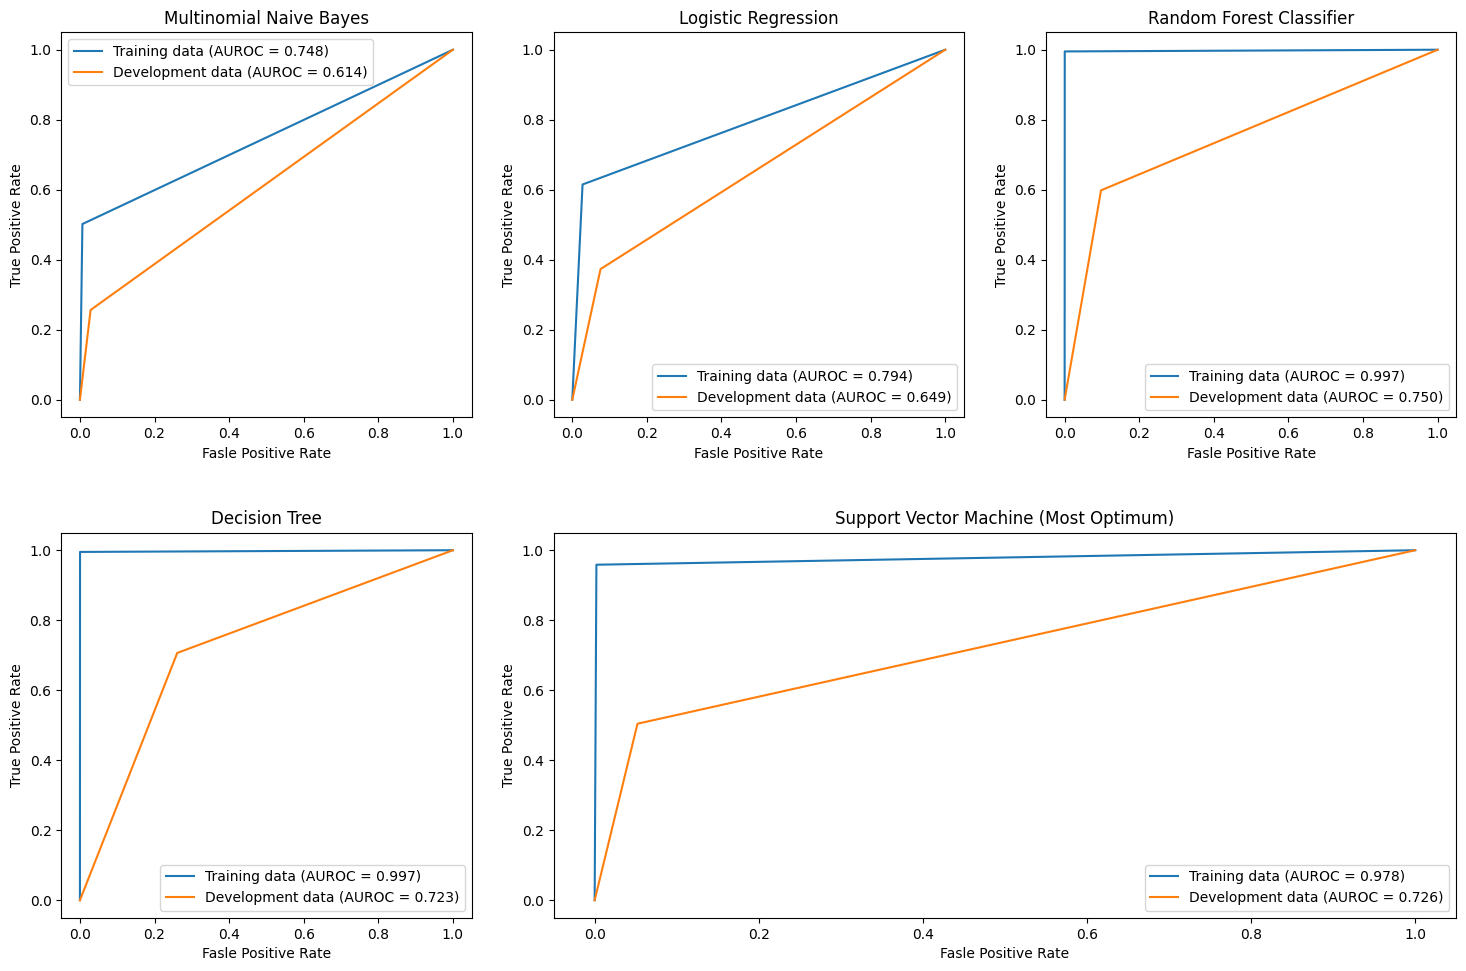

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure()
figure.set_size_inches(18, 18, forward=True)

axis1 = plt.subplot2grid((3,3),(0,0))
axis2 = plt.subplot2grid((3,3),(0,1))
axis3 = plt.subplot2grid((3,3),(0,2))
axis4 = plt.subplot2grid((3,3),(1,0))
axis5 = plt.subplot2grid((3,3),(1,1),colspan=2)


axis1.plot(nb_f_train, nb_t_train, label="Training data (AUROC = %0.3f)" %nb_auc_train)
axis1.plot(nb_f_dev, nb_t_dev, label="Development data (AUROC = %0.3f)" %nb_auc_dev)
axis1.set_title("Multinomial Naive Bayes")
axis1.set_xlabel("Fasle Positive Rate")
axis1.set_ylabel("True Positive Rate")
axis1.legend()


axis2.plot(lr_f_train, lr_t_train, label="Training data (AUROC = %0.3f)" %lr_auc_train)
axis2.plot(lr_f_dev, lr_t_dev, label="Development data (AUROC = %0.3f)" %lr_auc_dev)
axis2.set_title("Logistic Regression")
axis2.set_xlabel("Fasle Positive Rate")
axis2.set_ylabel("True Positive Rate")
axis2.legend()

axis3.plot(rf_f_train, rf_t_train, label="Training data (AUROC = %0.3f)" %rf_auc_train)
axis3.plot(rf_f_dev, rf_t_dev, label="Development data (AUROC = %0.3f)" %rf_auc_dev)
axis3.set_title("Random Forest Classifier")
axis3.set_xlabel("Fasle Positive Rate")
axis3.set_ylabel("True Positive Rate")
axis3.legend()

axis4.plot(dt_f_train, dt_t_train, label="Training data (AUROC = %0.3f)" %dt_auc_train)
axis4.plot(dt_f_dev, dt_t_dev, label="Development data (AUROC = %0.3f)" %dt_auc_dev)
axis4.set_title("Decision Tree")
axis4.set_xlabel("Fasle Positive Rate")
axis4.set_ylabel("True Positive Rate")
axis4.legend()


axis5.plot(svm_f_train, svm_t_train, label="Training data (AUROC = %0.3f)" %svm_auc_train)
axis5.plot(svm_f_dev, svm_t_dev, label="Development data (AUROC = %0.3f)" %svm_auc_dev)
axis5.set_title("Support Vector Machine (Most Optimum)")
axis5.set_xlabel("Fasle Positive Rate")
axis5.set_ylabel("True Positive Rate")
axis5.legend()

# plt.gca().axes.get_yaxis().set_visible(False)
# plt.gca().axes.get_xaxis().set_visible(False)


# set the spacing between subplots
plt.subplots_adjust(
                    hspace=0.3
                    )
plt.show()

In [ ]:
rf_auc_train

0.997411975290937

In [ ]:
nb_t_train

array([0.        , 0.50097466, 1.        ])

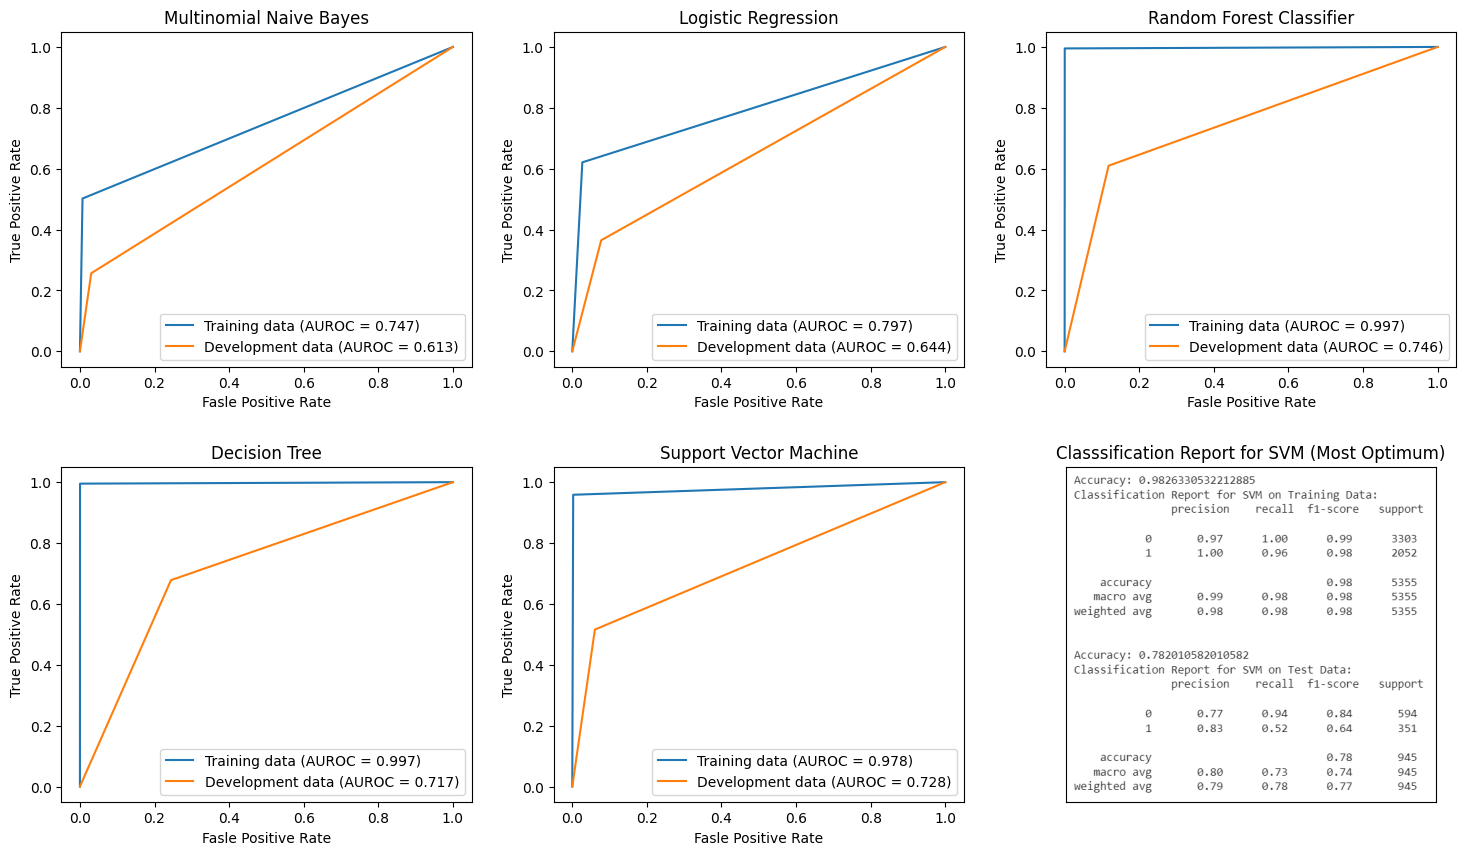

In [ ]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2, 3)
figure.set_size_inches(18, 10, forward=True)


axis[0,0].plot(nb_f_train, nb_t_train, label="Training data (AUROC = %0.3f)" %nb_auc_train)
axis[0,0].plot(nb_f_dev, nb_t_dev, label="Development data (AUROC = %0.3f)" %nb_auc_dev)
axis[0,0].set_title("Multinomial Naive Bayes")
axis[0,0].set_xlabel("Fasle Positive Rate")
axis[0,0].set_ylabel("True Positive Rate")
axis[0,0].legend()

axis[1,1].plot(svm_f_train, svm_t_train, label="Training data (AUROC = %0.3f)" %svm_auc_train)
axis[1,1].plot(svm_f_dev, svm_t_dev, label="Development data (AUROC = %0.3f)" %svm_auc_dev)
axis[1,1].set_title("Support Vector Machine")
axis[1,1].set_xlabel("Fasle Positive Rate")
axis[1,1].set_ylabel("True Positive Rate")
axis[1,1].legend()


axis[0,2].plot(rf_f_train, rf_t_train, label="Training data (AUROC = %0.3f)" %rf_auc_train)
axis[0,2].plot(rf_f_dev, rf_t_dev, label="Development data (AUROC = %0.3f)" %rf_auc_dev)
axis[0,2].set_title("Random Forest Classifier")
axis[0,2].set_xlabel("Fasle Positive Rate")
axis[0,2].set_ylabel("True Positive Rate")
axis[0,2].legend()

axis[1,0].plot(dt_f_train, dt_t_train, label="Training data (AUROC = %0.3f)" %dt_auc_train)
axis[1,0].plot(dt_f_dev, dt_t_dev, label="Development data (AUROC = %0.3f)" %dt_auc_dev)
axis[1,0].set_title("Decision Tree")
axis[1,0].set_xlabel("Fasle Positive Rate")
axis[1,0].set_ylabel("True Positive Rate")
axis[1,0].legend()

axis[0,1].plot(lr_f_train, lr_t_train, label="Training data (AUROC = %0.3f)" %lr_auc_train)
axis[0,1].plot(lr_f_dev, lr_t_dev, label="Development data (AUROC = %0.3f)" %lr_auc_dev)
axis[0,1].set_title("Logistic Regression")
axis[0,1].set_xlabel("Fasle Positive Rate")
axis[0,1].set_ylabel("True Positive Rate")
axis[0,1].legend()

import matplotlib.image as image
img = image.imread("/content/drive/Shareddrives/NLP Shared Tasks/hate svm.png")
axis[1,2].imshow(img)
axis[1,2].set_yticklabels([])
axis[1,2].set_xticklabels([])
axis[1,2].set_title("Classsification Report for SVM (Most Optimum)")

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)


# set the spacing between subplots
plt.subplots_adjust(
                    hspace=0.3
                    )
plt.show()

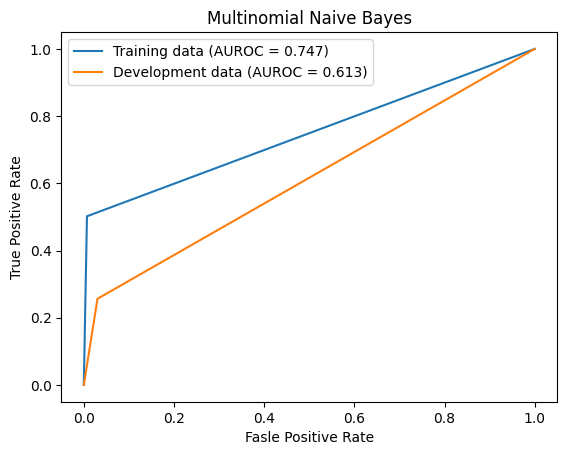

In [ ]:
|import matplotlib.pyplot as plt

plt.plot(nb_f_train, nb_t_train, label="Training data (AUROC = %0.3f)" %nb_auc_train)
plt.plot(nb_f_dev, nb_t_dev, label="Development data (AUROC = %0.3f)" %nb_auc_dev)

plt.title("Multinomial Naive Bayes")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

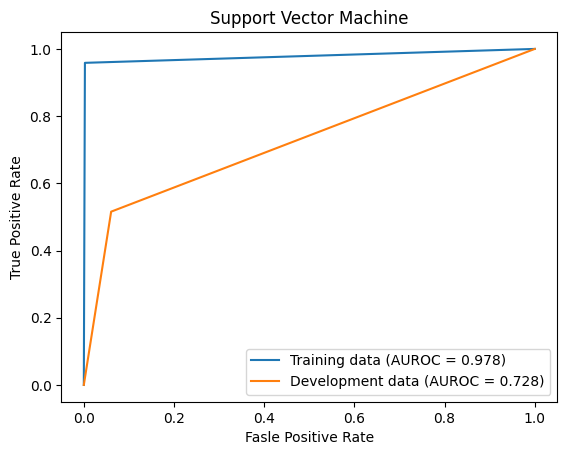

In [ ]:
import matplotlib.pyplot as plt

plt.plot(svm_f_train, svm_t_train, label="Training data (AUROC = %0.3f)" %svm_auc_train)
plt.plot(svm_f_dev, svm_t_dev, label="Development data (AUROC = %0.3f)" %svm_auc_dev)

plt.title("Support Vector Machine")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

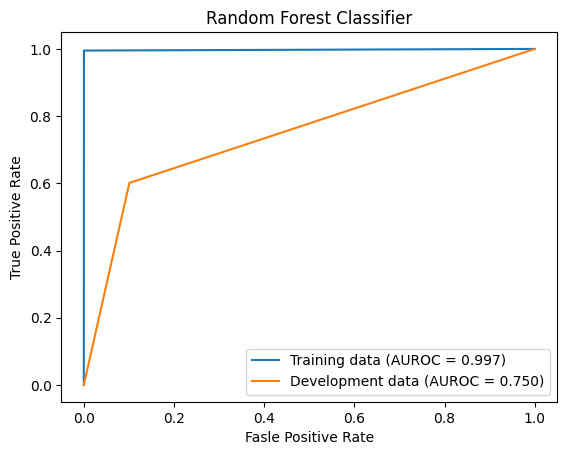

In [ ]:
import matplotlib.pyplot as plt

plt.plot(rf_f_train, rf_t_train, label="Training data (AUROC = %0.3f)" %rf_auc_train)
plt.plot(rf_f_dev, rf_t_dev, label="Development data (AUROC = %0.3f)" %rf_auc_dev)

plt.title("Random Forest Classifier")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

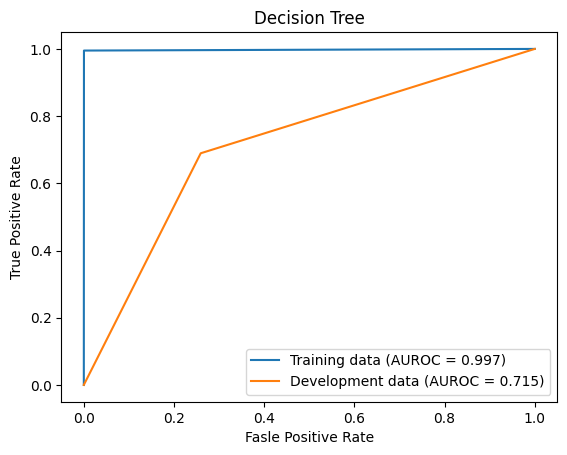

In [ ]:
import matplotlib.pyplot as plt

plt.plot(dt_f_train, dt_t_train, label="Training data (AUROC = %0.3f)" %dt_auc_train)
plt.plot(dt_f_dev, dt_t_dev, label="Development data (AUROC = %0.3f)" %dt_auc_dev)

plt.title("Decision Tree")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

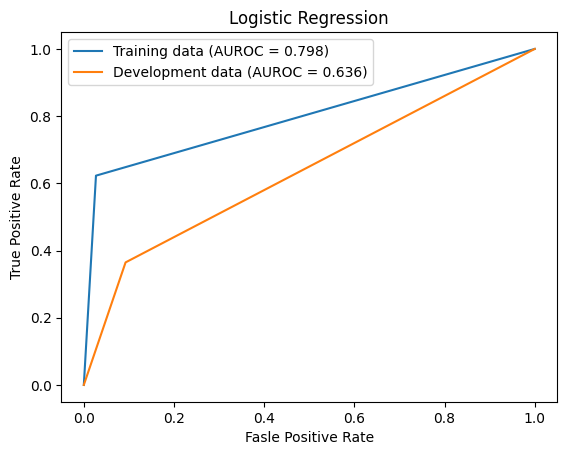

In [ ]:
import matplotlib.pyplot as plt

plt.plot(lr_f_train, lr_t_train, label="Training data (AUROC = %0.3f)" %lr_auc_train)
plt.plot(lr_f_dev, lr_t_dev, label="Development data (AUROC = %0.3f)" %lr_auc_dev)

plt.title("Logistic Regression")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/NLP Shared Tasks/Caste-Immigration Hate Speech/train.csv")

In [ ]:
df["label"] = df["label"].astype(str)

In [ ]:
df

,id,text,label
0,4694,தமிழ்நாடுக்கு சிறப்பு அதிகாரம் வேண்டும்.வடக்கன...,0
1,3725,Holi festival .so they go to native. 12 hours...,0
2,2469,"மதம், இனம், மொழி, நாடு, சாதி, பணக்காரன், ஏழை, ...",1
3,2637,Like this one day all these North Indias are g...,1
4,244,### I use to respect tamilians a lost but the ...,0
...,...,...,...
5350,3504,Ellarum 10 varusam 15 varusam soldranga ithell...,0
5351,4979,@yogeshwaran2530 naa mumbai la dhaan irukkuren,0
5352,5198,தமிழன் பின் வரும் காலங்களில் பிச்சை எடுக்கும் ...,0
5353,7570,வடகலை/தென்கலை மொத்தமா எல்லோருமே கிருக்கு கூ..ய...,1


In [ ]:
df["label"].loc[df["label"] == 1] = "Caste/Immigration Hate Speech"
df["label"].loc[df["label"] == 0] = "Not Caste/Immigration Hate Speech"
df

<ipython-input-49-f8c748850e3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"].loc[df["label"] == 1] = "Caste/Immigration Hate Speech"


,id,text,label
0,4694,தமிழ்நாடுக்கு சிறப்பு அதிகாரம் வேண்டும்.வடக்கன...,Not Caste/Immigration Hate Speech
1,3725,Holi festival .so they go to native. 12 hours...,Not Caste/Immigration Hate Speech
2,2469,"மதம், இனம், மொழி, நாடு, சாதி, பணக்காரன், ஏழை, ...",Caste/Immigration Hate Speech
3,2637,Like this one day all these North Indias are g...,Caste/Immigration Hate Speech
4,244,### I use to respect tamilians a lost but the ...,Not Caste/Immigration Hate Speech
...,...,...,...
5350,3504,Ellarum 10 varusam 15 varusam soldranga ithell...,Not Caste/Immigration Hate Speech
5351,4979,@yogeshwaran2530 naa mumbai la dhaan irukkuren,Not Caste/Immigration Hate Speech
5352,5198,தமிழன் பின் வரும் காலங்களில் பிச்சை எடுக்கும் ...,Not Caste/Immigration Hate Speech
5353,7570,வடகலை/தென்கலை மொத்தமா எல்லோருமே கிருக்கு கூ..ய...,Caste/Immigration Hate Speech


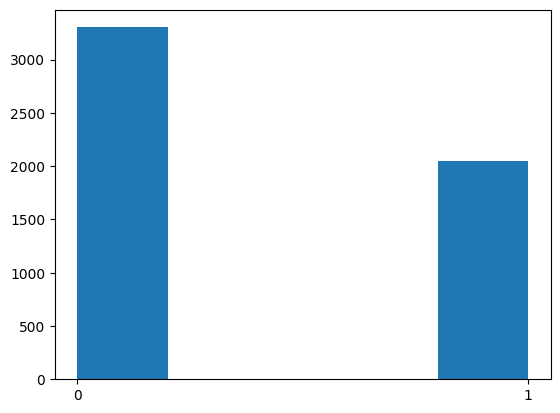

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["label"], bins = 5)
plt.savefig("train_dsit")
plt.show()


In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/NLP Shared Tasks/Caste-Immigration Hate Speech/dev.csv")

In [ ]:
df["label"] = df["label"].astype(str)

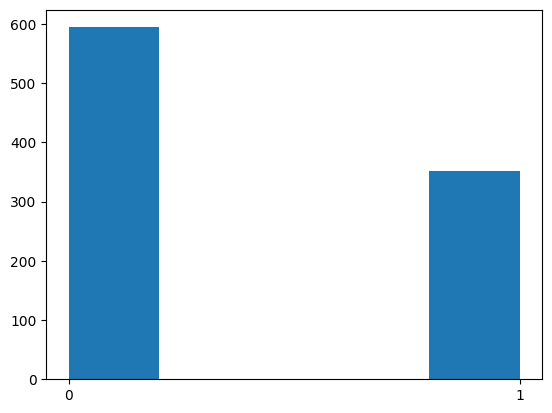

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["label"], bins = 5)
plt.savefig("dev_dsit")
plt.show()
